<a href="https://colab.research.google.com/github/MaysamCHAARI/-Entity-relationship_checkpoint/blob/main/CNN_LSTM_model_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/My Drive/Dataset', output="output", seed=134, ratio=(.7, 0.2,0.1))

Copying files: 6410 files [03:25, 31.16 files/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_HEIGHT = 128
IMG_WIDTH = 128
#add data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create image datasets from directory with data augmentation

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
#labels="inferred",  # Automatically infer labels from directory structure
label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
labels="inferred",  # Automatically infer labels from directory structure
label_mode="categorical"
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
labels="inferred",  # Automatically infer labels from directory structure
label_mode="categorical"
)



Found 4486 files belonging to 4 classes.
Found 1281 files belonging to 4 classes.
Found 643 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

### LSTM

this is the trainig code now

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, LSTM, Flatten, Reshape, Dropout, Dense, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall,F1Score
# Confusion Matrix function

# Define the input shape for the LSTM (sequence_length, num_features)
sequence_length = 64   # Adjust this to the length of your sequences
num_features = 1

IMG_HEIGHT, IMG_WIDTH = 128, 128

model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, "relu"))

model.add(keras.layers.Reshape((sequence_length, num_features)))

# Add the LSTM layer
model.add(keras.layers.LSTM(64,  return_sequences=True,
              activation='tanh', recurrent_activation='hard_sigmoid')) # You can adjust the number of units as needed
model.add(keras.layers.LSTM(32))  # You can adjust the number of units as needed

model.add(keras.layers.Dense(4, "softmax"))

#model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=[
        "accuracy",
        Precision(name='precision'),
        Recall(name='recall'),
         F1Score(average='weighted', name='f1_score')
    ])
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

### 2 eme model

# Training

In [ ]:
2 eme model j'ai ajouter dropout la resultat est mieux

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=35, batch_size=64)

Epoch 1/35
71/71 [==============================] - 91s 1s/step - loss: 1.0609 - accuracy: 0.4911 - precision: 0.5264 - recall: 0.2091 - f1_score: 0.3431 - val_loss: 1.0471 - val_accuracy: 0.3513 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1826
Epoch 2/35
71/71 [==============================] - 86s 1s/step - loss: 0.9779 - accuracy: 0.5334 - precision: 0.6431 - recall: 0.3005 - f1_score: 0.4762 - val_loss: 0.9158 - val_accuracy: 0.5558 - val_precision: 0.8212 - val_recall: 0.2475 - val_f1_score: 0.5212
Epoch 3/35
71/71 [==============================] - 85s 1s/step - loss: 0.8998 - accuracy: 0.5794 - precision: 0.7273 - recall: 0.3306 - f1_score: 0.5397 - val_loss: 0.8605 - val_accuracy: 0.5995 - val_precision: 0.7557 - val_recall: 0.3622 - val_f1_score: 0.5593
Epoch 4/35
71/71 [==============================] - 84s 1s/step - loss: 0.8462 - accuracy: 0.6068 - precision: 0.7470 - recall: 0.3823 - f1_score: 0.5789 - val_loss: 0.7880 - val_accuracy: 0.6300 - va

In [ ]:
# prompt: save model and reload it

# Save the model
model.save("/content/drive/MyDrive/modelLSTM.h5")

# Reload the model
loaded_model = keras.models.load_model("/content/drive/MyDrive/modelLSTM.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: test the loaded model result
loaded_model = keras.models.load_model("/content/drive/MyDrive/modelLSTM.h5")

# Evaluate the loaded model
loaded_model.evaluate(test_ds)


11/11 [==============================] - 5s 52ms/step - loss: 0.0255 - accuracy: 0.9938 - precision: 0.9938 - recall: 0.9938 - f1_score: 0.9938


[0.02547827921807766,
 0.993779182434082,
 0.993779182434082,
 0.993779182434082,
 0.993818998336792]

In [ ]:
!pip install scikit-plot

1/1 [==============================] - 1s 597ms/step
[[ 89   1   0   0]
 [  0   8   0   0]
 [  0   0 319   1]
 [  0   0   2 223]]


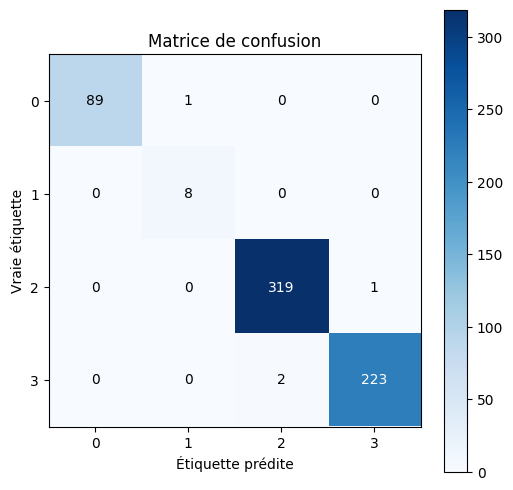

In [ ]:
# prompt: get confusion matrix
import scikitplot as skplt

import numpy as np
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = loaded_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels, axis=1))

confusion_matrix = confusion_matrix(y_true, y_pred)

print(confusion_matrix)
# Create a ConfusionMatrixDisplay object with appropriate classes
disp = skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(6, 6))
# Customize and display the confusion matrix plot
disp.plot(cmap=plt.cm.Blues)  # Adjust colormap if desired
plt.title('Matrice de confusion')
plt.xlabel('Étiquette prédite')
plt.ylabel('Vraie étiquette')
plt.show()

In [ ]:
model.save('my_model.keras')

In [ ]:
new_model = tf.keras.models.load_model('my_model.keras')

In [ ]:
np.save('my_history_CNN-LSTnewmodel.npy', history.history)

In [ ]:
results = model.evaluate(test_ds)

11/11 [==============================] - 7s 620ms/step - loss: 0.0255 - accuracy: 0.9938 - precision: 0.9938 - recall: 0.9938 - f1_score: 0.9938


In [ ]:
savedmetrics = np.load('my_history_CNN-LSTM.npy',allow_pickle=True)

Confusion matrix

In [ ]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

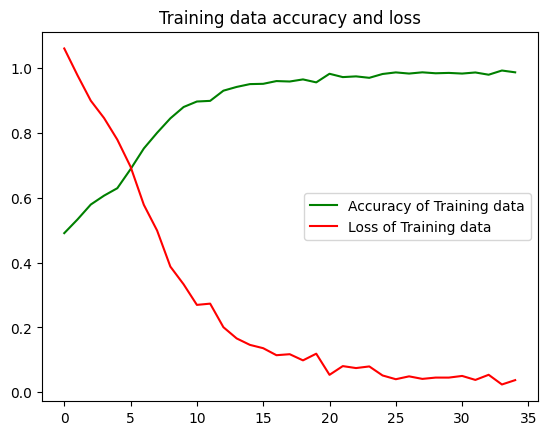

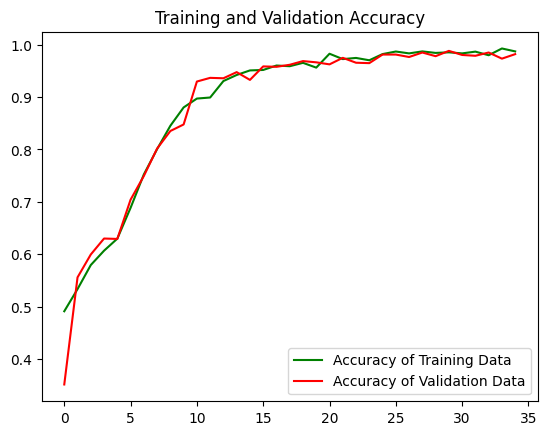

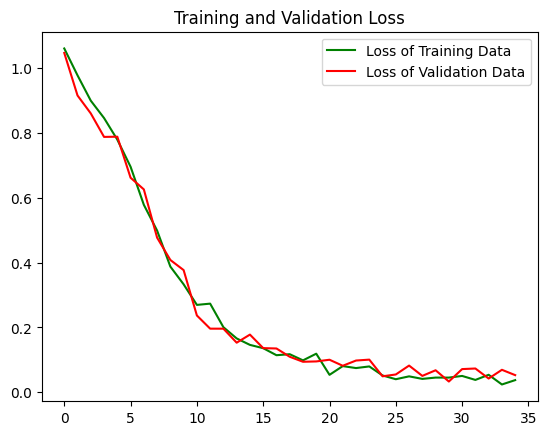

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

11/11 [==============================] - 1s 74ms/step
Matrice de confusion :
[[  9   3  50  28]
 [  2   0   3   3]
 [ 45   3 161 111]
 [ 33   3 107  82]]


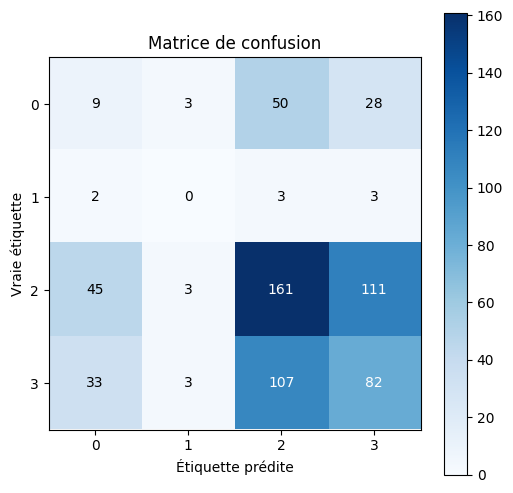

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import scikitplot as skplt

# Faire des prédictions sur l'ensemble de données de test
predictions = loaded_model.predict(test_ds)

# Extract true labels from test dataset
y_true = np.concatenate([np.argmax(y, axis=1) for _, y in test_ds], axis=0)

# Convertir les prédictions en étiquettes de classe
y_pred = np.argmax(predictions, axis=1)

# Obtenir les étiquettes de classe uniques
labels = np.unique(np.concatenate([np.argmax(y, axis=1) for _, y in test_ds], axis=0))

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(cm)

# Afficher la matrice de confusion sous forme de graphique
disp = skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.xlabel('Étiquette prédite')
plt.ylabel('Vraie étiquette')
plt.show()